In [1]:
import backtrader as bt
import yfinance as yf

## Load TESLA daily and hourly bars from Yahoo Finance

In [6]:
tesla_daily = yf.download('TSLA', start='2020-01-01')
tesla_hourly = yf.download('TSLA', start='2020-01-01')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


## PARSE DATA INTO BT FORMAT

In [23]:
tesla_daily_parsed = bt.feeds.PandasData(dataname=tesla_daily, datetime=None, open=0, high=1, low=2, close=4, volume=5, openinterest=-1)
tesla_hourly_parsed = bt.feeds.PandasData(dataname=tesla_hourly, datetime=None, open=0, high=1, low=2, close=4, volume=5, openinterest=-1, timeframe=bt.TimeFrame.Minutes)

In [10]:
cerebro = bt.Cerebro()
cerebro.adddata(tesla_daily_parsed)
cerebro.run()

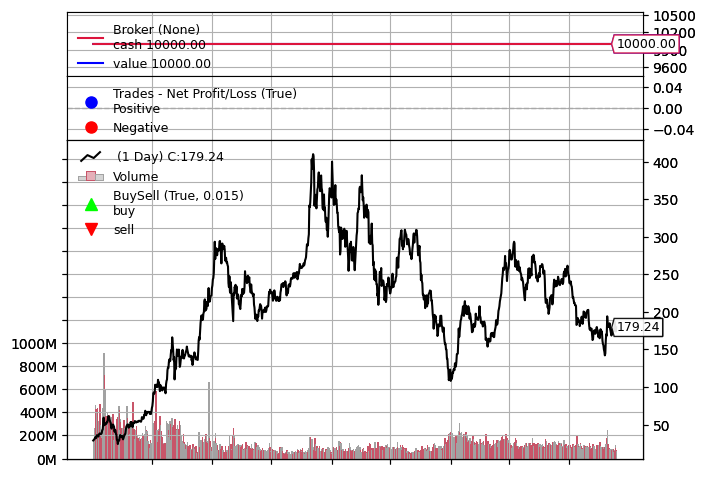

[[<Figure size 640x480 with 8 Axes>]]

In [11]:
%matplotlib inline
cerebro.plot(iplot=False)

In [12]:
cerebro = bt.Cerebro()
cerebro.adddata(tesla_hourly_parsed)
cerebro.adddata(tesla_daily_parsed)
cerebro.run()

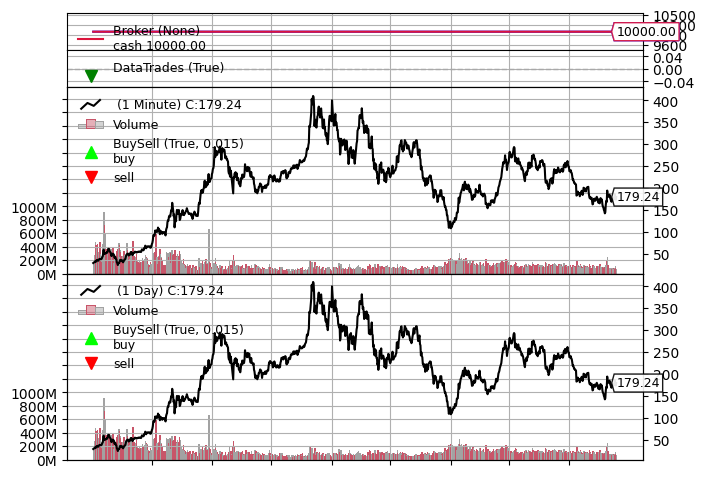

[[<Figure size 640x480 with 6 Axes>]]

In [13]:
%matplotlib inline
cerebro.plot(iplot=False)

## RESAMPLE DATA

In [24]:
# Convert daily data to weekly data by using compression=5
cerebro = bt.Cerebro()
cerebro.resampledata(dataname=tesla_hourly_parsed, timeframe=bt.TimeFrame.Days, compression=5)
cerebro.adddata(tesla_daily_parsed)
cerebro.run()

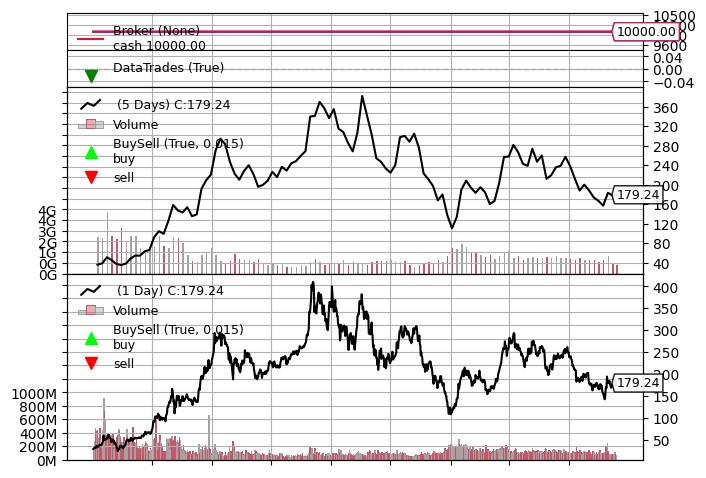

[[<Figure size 640x480 with 6 Axes>]]

In [25]:
%matplotlib inline
cerebro.plot(iplot=False)